In [52]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

# Import Data Set and Pre Processing Image 

In [53]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [54]:
len(X_train)


60000

In [55]:
len(X_test)

10000

In [56]:
X_train[0].shape

(28, 28)

In [57]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

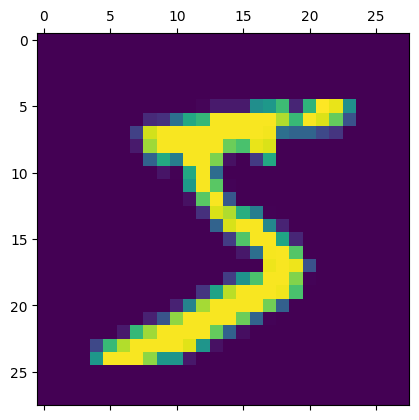

In [58]:
plt.matshow(X_train[0])

In [59]:
y_train[0]

5

In [61]:
X_train =X_train/255
X_test = X_test/255

X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [62]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


X_train_flattened.shape
#X_test_flattened.shape


(60000, 784)

In [63]:
X_train_flattened[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [64]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1881 - accuracy: 0.5937
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9772 - accuracy: 0.7094
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7906 - accuracy: 0.7355
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6268 - accuracy: 0.7609
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4838 - accuracy: 0.7768


In [65]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4039 - accuracy: 0.8004


[1.4039267301559448, 0.8004000186920166]

In [66]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([0.31880197, 0.40207076, 0.35642606, 0.41107666, 0.4678879 ,
       0.37847468, 0.28157547, 0.80695385, 0.37643385, 0.5864811 ],
      dtype=float32)

In [67]:
np.argmax(y_predicted[0])

7

In [68]:
y_predicted_lables = [np.argmax(i) for i in y_predicted]

y_predicted_lables[:5]

[7, 2, 1, 0, 4]

In [69]:
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_lables)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 931,    2,    7,    8,    0,    2,   23,    1,    6,    0],
       [   0, 1108,    8,    4,    0,    0,    3,    0,   12,    0],
       [  19,   86,  798,   25,   15,    0,   28,   22,   38,    1],
       [   7,   50,   27,  857,    1,    2,    5,   23,   28,   10],
       [   2,   53,    4,    0,  743,    0,   27,   10,    4,  139],
       [  40,  116,    5,  205,   25,  370,   26,   42,   32,   31],
       [  30,   50,   10,    0,   12,    9,  842,    1,    4,    0],
       [   2,   72,   14,    2,    7,    0,    3,  900,    7,   21],
       [  22,   92,   10,   89,   10,    5,   16,   24,  676,   30],
       [  23,   43,    5,    9,   53,    0,    1,   87,    9,  779]])>

Text(95.72222222222221, 0.5, 'Truth')

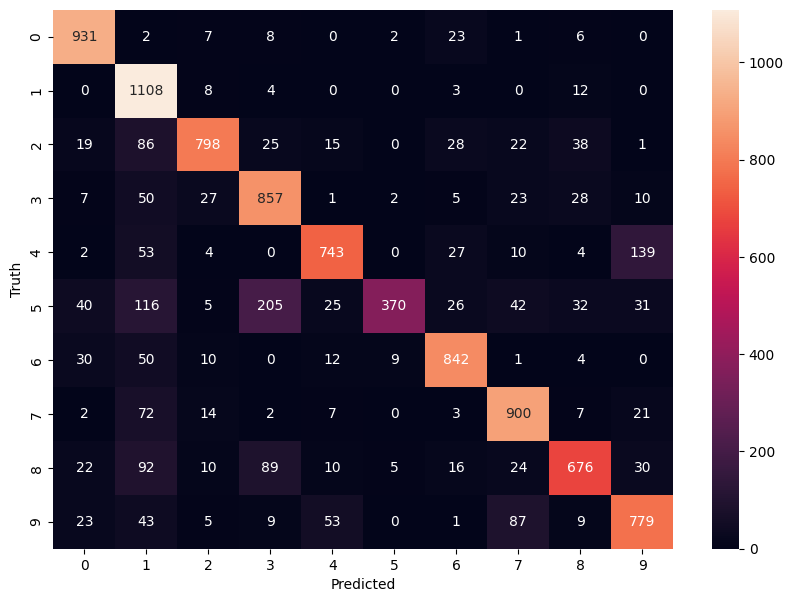

In [79]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Hidden Layers

In [84]:
model = keras.Sequential([keras.layers.Dense(100, input_shape=(784,), activation='relu'), 
                          keras.layers.Dense(10, activation='sigmoid')
                          ])


model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs = 5)



Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1840 - accuracy: 0.7284
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4944 - accuracy: 0.8729
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3859 - accuracy: 0.8946
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3440 - accuracy: 0.9035
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3209 - accuracy: 0.9085


In [85]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3032 - accuracy: 0.9136


[0.30319350957870483, 0.9136000275611877]

In [90]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted] 


cm= tf.math.confusion_matrix(labels=y_test, predictions= y_predicted_labels)


313/313 [==============================] - 1s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

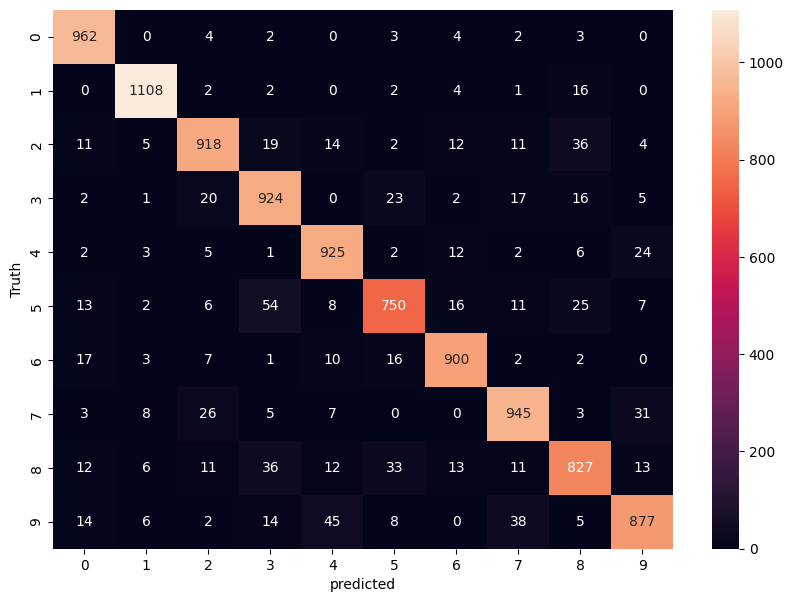

In [93]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [96]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(100,activation='relu'),
                         keras.layers.Dense(10,activation='sigmoid')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2292 - accuracy: 0.6985
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5180 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4008 - accuracy: 0.8907
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3539 - accuracy: 0.9001
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3279 - accuracy: 0.9064
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3112 - accuracy: 0.9109
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2984 - accuracy: 0.9148
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2879 - accuracy: 0.9175
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2785 - accuracy: 0.9199
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.270

In [97]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2617 - accuracy: 0.9253


[0.2617334723472595, 0.9253000020980835]